## Ajani Mnyandu P3 - Plotting Using Cartopy

### Instructions:

Write a notebook to produce the following maps:

1. The Antarctic continent and the Southern Ocean starting from 60°S
2. The South Atlantic, from 20°S to 50°S. The map should show the following locations: Walvis Bay, Cape Town, Rio de Janeiro, Montevideo
3. A series of 3 panels showing the use of different coastline resolutions from the GSHHG database in a map of False Bay. Display the coarse, intermediate and full resolution.

### Antarctica and Southern Ocean

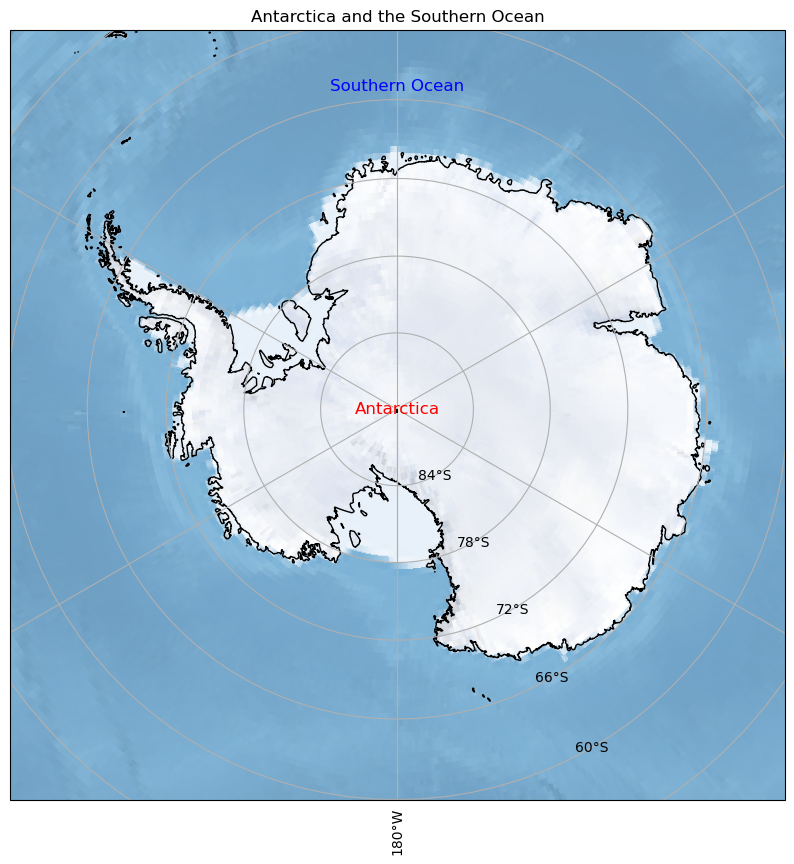

In [26]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from  geopy.geocoders import Nominatim

extent = [-180, 180, -90, -60]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})

ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

gl.xlabel_style = {'size': 10}  
gl.ylabel_style = {'size': 10}  
gl.xlocator = plt.MaxNLocator(7) 
gl.ylocator = plt.MaxNLocator(7)  

gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

ax.text(0, -90, 'Antarctica', transform=ccrs.PlateCarree(), ha='center', va='center', fontsize=12, color='red')
ax.text(0, -65, 'Southern Ocean', transform=ccrs.PlateCarree(), ha='center', va='center', fontsize=12, color='blue')


plt.title('Antarctica and the Southern Ocean')
plt.show()


### South Atlantic with Major Cities



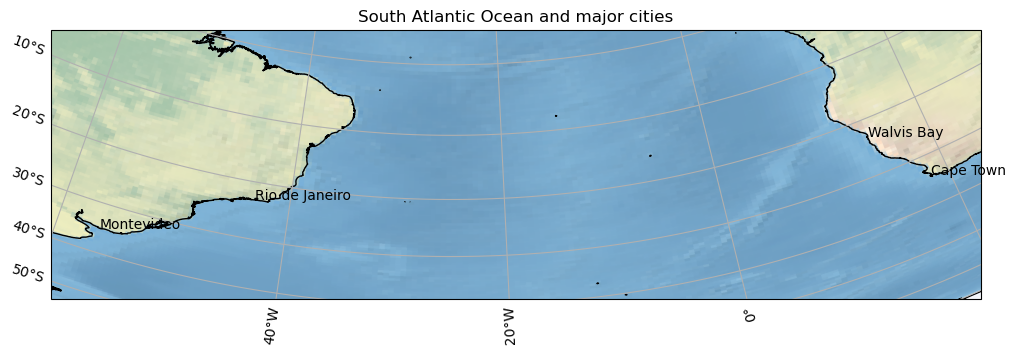

In [48]:
extents = [-60, 22, -40, -10]
central_lon, central_lat = np.mean(extents[2:]), np.mean(extents[:2])
geolocator = Nominatim(user_agent="educational")


place_names = ['Montevideo', 'Rio De Janeiro', 'Walvis Bay', 'Cape Town']
place_addresses = []
for place in place_names:
    loc = geolocator.geocode(place, language="en")
    place_addresses.append(loc)


fig, ax = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
ax.set_extent(extents, crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Plot text annotations for each place name using loc.raw to fetch only the string that has the city name
for loc in place_addresses:
    if loc:
        city_name = loc.raw.get('name', '')
        ax.text(loc.longitude, loc.latitude, city_name, transform=ccrs.PlateCarree())

plt.title('South Atlantic Ocean and major cities')
plt.show()



### False Bay Coastline at Coarse, Medium and High

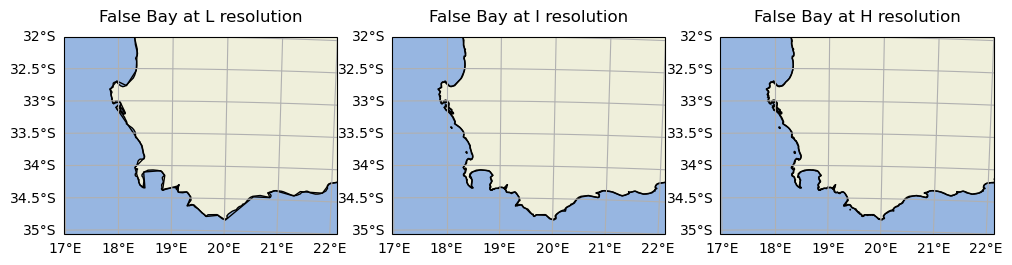

In [61]:
central_lon, central_lat = 18, -34.5
extents = [17, 22, -32, -35]
resolutions = ['l', 'i', 'h']  # Different resolutions

fig, axes = plt.subplots(1, len(resolutions), figsize=(12, 12), subplot_kw={'projection': ccrs.Orthographic(central_lon, central_lat)})

for ax, scale in zip(axes, resolutions):
    ax.set_extent(extents, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.GSHHSFeature(scale=scale))  # Use scale from the loop
    gl = ax.gridlines(draw_labels=True)
    gl.right_labels = False
    gl.top_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    ax.set_title(f'False Bay at {scale.upper()} resolution')
        
plt.show()



